In [29]:
using LinearAlgebra
using Plots

In [73]:
#= Physic constant define :
    - ħ stands for reduced Planck constant
    - k stands for force constant
    - m stands for mass of the particle
=#

ħ = 1
k = 1
m = 1
ω = sqrt(k/m)

#= Consts define :
    - n   number of division
    - x⁻  left boundary of position
    - x⁺  right boundary of position
    - Δx  step size of position  
=#
n = 1000
x⁺ = 10
x⁻ = -10
Δx = (x⁺-x⁻)/n

#===================================================
Mathematic model pre-defines for harmonic oscillator
===================================================#

#= Potential energy ∨(x)
    - x : position input, support vector input 
    
    Return the potential energy based on harmonic oscillator
    
    Example:
    for input x it gives return ∨(x)
    for vector x⃗ it gives return [∨(x₁),∨(x₂),...,∨(xₙ)]
=#
function ∨(x)
    return 1/2*k*x.^2
end

#===========================================
 Pre-defines for solveing numercial solution
============================================#

#= Position vector x⃗
    Physical definiton:
    - x⃗ = [x₁,x₂,...,xₙ] 
=#
x⃗ = Float64[x⁻+i*Δx for i in 0:n-1]

#= Momentum operator square p̂²
    for a 5*5 momentum operator square matrix
            [-2 1 . . .]
            [1 -2 1 . .]
    - p̂² =  [. 1 -2 1 .]   *  -ħ^2/(Δx^2)
            [. . 1 -2 1]
            [. . . 1 -2]
=#
p̂² = diagm(0=>-2*ones(n),1=>ones(n-1),-1=>ones(n-1))*-ħ^2/(Δx^2)

#= Potential operator ∨̂
    for a 5*5 momentum operator square matrix
            [∨(x₁). . . . ]
            [. ∨(x₂). . . ]
    - ∨̂ =   [. . ∨(x₃). . ]
            [. . . ∨(x₄). ]
            [. . . . ∨(x₅)]
    
=#
∨̂ = diagm(0=>∨(x⃗))

#= Hamiltonian  operator Ĥ
    Hamiltonian operator will be the sum of kinetic energy & potential energy
    - Ĥ = p̂²/2m + ∨̂
=#
Ĥ = p̂²/2m + ∨̂

# Find Eigenvalues and eigenvectors for Ĥ
E,ψ = eigen(Ĥ)

# normalize each eigenvector
for i in 1:n
    ψ[:,i] = ψ[:,i]/norm(ψ[:,i])
end

In [48]:
#==================================
Analytical solution for harmonic oscillator
===================================#
#= Hermite polynomial Hₙ(n,x)
    - n : order of Hermite polynomial
    - x : position input, support vector input 
    
    Return nth Hermite polynomial (defined to order 5)
=#
function Hermite(n,x)
    if n == 0
        return 1
    elseif n == 1
        return x
    elseif n == 2
        return x.^2 .-1
    elseif n == 3
        return x.^3 .-3*x
    elseif n == 4
        return x.^4 .-6*x+3
    elseif n == 5
        return x.^5 .-10*x.^3 .+15*x
    end
end

#= Analytic solution of harmonic oscillator
    - n : energy level
    - x : position input, support vector input 
    
    Return the analytic solution of harmonic oscillator
    
    Example:
    for input x it gives return ϕ(n,x)
    for vector x⃗ it gives return [ϕ(n,x₁),ϕ(n,x₂),...,ϕ(n,xₙ)]
=#
function ϕ(n,x)
    return 1/sqrt(2^n*factorial(n))*((m*ω)/(π*ħ))^(1/4)*exp.(-m*ω*x.^2/(2*ħ)).*Hermite(n,m*ω*x/ħ)
end


ϕ (generic function with 1 method)

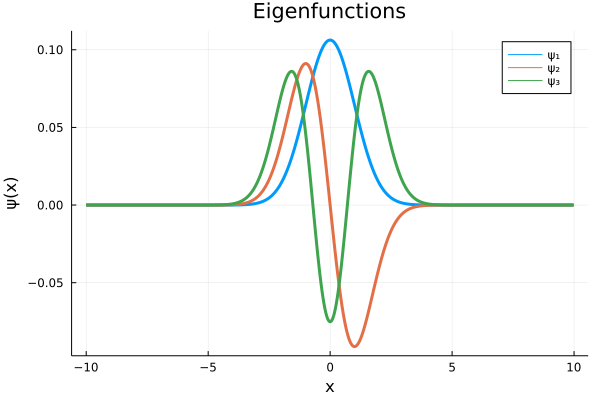

In [76]:
#= Plot the eigenfunctions and potential energy
    - x⃗ : position vector
    - ψ  : eigenfunctions
    - E  : eigenenergies
=#
plot(x⃗,ψ[:,1:3],label=["ψ₁" "ψ₂" "ψ₃"],title="Eigenfunctions",xlabel="x",ylabel="ψ(x)",lw=3,)